<a href="https://colab.research.google.com/github/mc-juan-vargas-2024/cuadernos-y-proyectos-ia/blob/main/Copia_de_Cuaderno_2_Manejo_de_Valores_Nulos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Cuaderno 2: Manejo de Valores Nulos

El manejo de valores nulos o perdidos es una parte esencial del preprocesamiento de datos. Los valores nulos pueden distorsionar los análisis y afectar la calidad de los modelos predictivos. Por ello, identificar y tratar los valores nulos de manera adecuada es fundamental para asegurar la integridad del análisis de datos.


---

## <font color="red">2.1 Detección de Valores Nulos

La detección de valores nulos es el primer paso. Existen diversas formas de hacerlo:
###Métodos Básicos:
* isnull(): Identifica valores nulos en el DataFrame y devuelve un resultado booleano.
* notnull(): Devuelve el opuesto de isnull().
* info(): Proporciona un resumen de las columnas, incluyendo el número de valores no nulos.

### Conteo de Nulos:
* isnull().sum(): Muestra la cantidad de valores nulos por columna.

### Visualización de Nulos:
* Matrices de calor (heatmaps): Con librerías como Seaborn, se puede visualizar la distribución de valores nulos.
* Gráficos de barras: Representan la cantidad de valores nulos por columna o fila.


## Ejemplo: Visualización de Nulos






In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un dataset simulado
data = {
    "Edad": [23, np.nan, 21, np.nan, 25, 19, 18, 20, np.nan, 22],
    "Género": ["F", "M", np.nan, "M", "F", "F", "M", np.nan, "F", "M"],
    "Calificación": [85, np.nan, 78, 88, np.nan, 92, 75, 80, np.nan, 77],
}
df = pd.DataFrame(data)


# Metodo para ver la sumatoria de nulos en el dataframe
df.isnull().sum()

,0
Edad,3
Género,2
Calificación,3


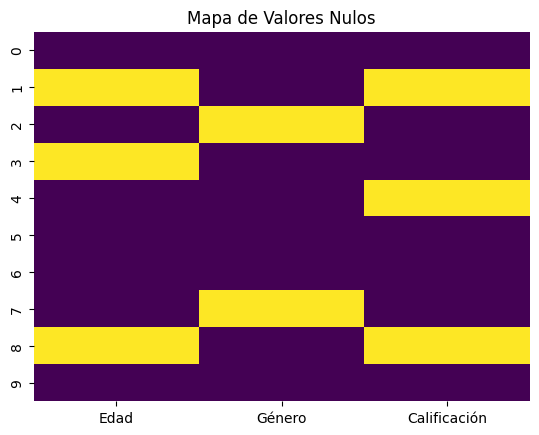

In [ ]:
# Mapa de calor para visualizar nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de Valores Nulos")
plt.show()

Edad            30.0
Género          20.0
Calificación    30.0
dtype: float64


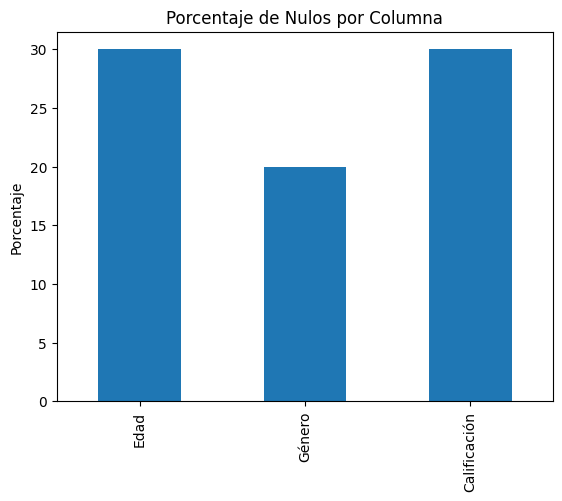

In [ ]:
# Porcentaje de valores nulos por columna
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

# Visualización del porcentaje de nulos
missing_percentage.plot(kind='bar', title='Porcentaje de Nulos por Columna')
plt.ylabel('Porcentaje')
plt.show()


## <font color="red">2.2 Estrategias para el Tratamiento de Valores Nulos
El tratamiento de valores nulos depende del tipo de datos y el contexto del problema. Las principales estrategias incluyen:

### <font color="blue">2.2.1 Eliminación de Filas o Columnas con Nulos
Se eliminan filas o columnas si:
* El porcentaje de datos faltantes es alto (por ejemplo, >50%).
* La fila o columna no es crítica para el análisis.

### **Métodos en Pandas**
* dropna(axis=0): Elimina filas con valores nulos.
* dropna(axis=1): Elimina columnas con valores nulos.


---

### <font color="blue">2.2.2 Imputación de Valores Faltantes
La imputación consiste en reemplazar los valores faltantes por valores estimados o calculados. Esto permite conservar la mayor cantidad de datos posible.

### Imputación para Datos Numéricos:

####Imputación con Estadísticas Básicas:
* Media: Reemplaza los nulos con el promedio de la columna.
* Mediana: Utiliza el valor central para evitar sesgos por valores atípicos.
* Moda: Para valores discretos comunes.

####Imputación con Valores Constantes o Ceros:
* Rellenar con un valor fijo (por ejemplo, 0 o un valor de referencia).

### Ejemplo: Imputación Básica



In [ ]:
# Rellenar valores nulos en "Edad" con la media
df["Edad"] = df["Edad"].fillna(df["Edad"].mean())

# Rellenar valores nulos en "Calificación" con la mediana
df["Calificación"] = df["Calificación"].fillna(df["Calificación"].median())
df

,Edad,Género,Calificación
0,23.000000,F,85.0
1,21.142857,M,80.0
2,21.000000,NaN,78.0
3,21.142857,M,88.0
4,25.000000,F,80.0
5,19.000000,F,92.0
6,18.000000,M,75.0
7,20.000000,NaN,80.0
8,21.142857,F,80.0
9,22.000000,M,77.0


## <font color="blue">2.2.3 Imputación para Datos Categóricos
###Uso de la Moda:
* Reemplaza los nulos con el valor más frecuente en la columna.

###Imputación Basada en Modelos:
* K-Nearest Neighbors (KNN): Utiliza similitudes con los valores vecinos para estimar los datos perdidos.
* Regresión: Predice los valores faltantes basándose en relaciones entre variables.
## Ejemplo: Imputación con la Moda


In [ ]:
# Rellenar valores nulos en "Género" con la moda
df["Género"] = df["Género"].fillna(df["Género"].mode()[0])
df

,Edad,Género,Calificación
0,23.000000,F,85.0
1,21.142857,M,80.0
2,21.000000,F,78.0
3,21.142857,M,88.0
4,25.000000,F,80.0
5,19.000000,F,92.0
6,18.000000,M,75.0
7,20.000000,F,80.0
8,21.142857,F,80.0
9,22.000000,M,77.0


## <font color="blue">2.2.4 Técnicas Avanzadas de Imputación
### MICE (Multiple Imputation by Chained Equations):
* Técnica iterativa que usa modelos estadísticos para predecir y rellenar valores faltantes múltiples veces.

### Modelos Predictivos:
* Emplea algoritmos como árboles de decisión o regresión para imputar valores basándose en otras características del dataset.

## Ejemplo: Imputación Avanzada con Scikit-learn


In [ ]:
from sklearn.impute import SimpleImputer

# Usar KNN para imputar valores en "Calificación"
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df[["Calificación"]] = imputer.fit_transform(df[["Calificación"]])
df

,Edad,Género,Calificación
0,23.000000,F,85.0
1,21.142857,M,80.0
2,21.000000,F,78.0
3,21.142857,M,88.0
4,25.000000,F,80.0
5,19.000000,F,92.0
6,18.000000,M,75.0
7,20.000000,F,80.0
8,21.142857,F,80.0
9,22.000000,M,77.0


## <font color="red">2.3 Técnicas de Validación de Imputación
Es importante evaluar la efectividad de la imputación para asegurarse de que no introduzca sesgos en el análisis. Se pueden utilizar las siguientes técnicas:
* Comparar distribuciones antes y después de la imputación.
* Validar el impacto de los datos imputados en modelos predictivos.
